<a href="https://colab.research.google.com/github/victoriazlren/victoriaren/blob/main/Who's_Faster_Usain_Bolt_or_Michael_Phelps%3F_Jan_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who's Faster -- Usain Bolt or Michael Phelps?

<img src="https://upload.wikimedia.org/wikipedia/commons/1/12/Usain_Bolt_after_4_%C3%97_100_m_Rio_2016.jpg" height="300px"/> <img src="https://media.npr.org/assets/img/2012/08/11/phelps_chest_custom-d239ac79c3c04de45483a17d1ef421f66b2ef812-s1100-c50.jpg" height="300px"/>

Usain Bolt and Michael Phelps are each regarded as the greatest athletes of their respective sports. But who was faster?

Does this question even make sense? How do we compare how fast Bolt _runs_ with how fast Phelps _swims_? Although their times are measured in seconds, 1 second of running is not comparable to 1 second of swimming.

One way to compare _running_ and _swimming_ is to put the times on the same scale. To do this, we will compare Bolt and Phelps to their competitors at the 2008 Beijing Olympics, where Bolt set world records in the 100m and 200m events and Phelps won a record eight gold medals. Conveniently, both Bolt and Phelps had exactly 7 competitors in the finals of each event.

First, let's read in the data, which is in the following directory: https://datasci112.stanford.edu/data/olympics/

In [2]:
import pandas as pd

data_dir = "https://datasci112.stanford.edu/data/olympics/"
df_bolt = pd.read_csv(data_dir + "bolt.csv")
df_phelps = pd.read_csv(data_dir + "phelps.csv")
df_phelps.head()

,Event,Rank,Lane,Athlete,Nation,Time
0,2008 Olympics 200m freestyle,1,6,Michael Phelps,United States,1:42.96
1,2008 Olympics 200m freestyle,2,5,Park Tae-Hwan,South Korea,1:44.85
2,2008 Olympics 200m freestyle,3,4,Peter Vanderkaay,United States,1:45.14
3,2008 Olympics 200m freestyle,4,3,Jean Basson,South Africa,1:45.97
4,2008 Olympics 200m freestyle,5,2,Paul Biedermann,Germany,1:46.00


## Part 1: Usain Bolt

One way to put variables on the same scale is to **standardize** them so that the mean is 0 and the standard deviation is 1.

To standardize a variable $x$, we subtract each value $x_i$ by the mean $\bar x$ and divide by the standard deviation:
$$ z_i \leftarrow \frac{x_i - \bar x}{\text{sd}(x)}. $$

### Question 1

Bolt competed in two individual events at the 2008 Olympics, the 100m and the 200m. Since they are different events, we should standardize each one separately.

To do this, we will first need the means and standard deviations of the times for each event. Use the split-apply-combine paradigm to calculate the means and standard deviations.

In [3]:
# YOUR CODE HERE
bolt_100m_mean = df_bolt[df_bolt["Event"] == "2008 Olympics 100m"]["Time"].mean()
bolt_100m_std = df_bolt[df_bolt["Event"] == "2008 Olympics 100m"]["Time"].std()
bolt_200m_mean = df_bolt[df_bolt["Event"] == "2008 Olympics 200m"]["Time"].mean()
bolt_200m_std = df_bolt[df_bolt["Event"] == "2008 Olympics 200m"]["Time"].std()
print(bolt_100m_mean, bolt_100m_std, bolt_200m_mean, bolt_200m_std)

9.9225 0.1052547929007104 20.0275 0.3923100086119935


In [4]:
bolt_mean = df_bolt.groupby("Event")["Time"].mean()
bolt_std = df_bolt.groupby("Event")["Time"].std()
print(bolt_mean, bolt_std)

Event
2008 Olympics 100m     9.9225
2008 Olympics 200m    20.0275
Name: Time, dtype: float64 Event
2008 Olympics 100m    0.105255
2008 Olympics 200m    0.392310
Name: Time, dtype: float64


### Question 2

Now, using the means and standard deviations (for each event) that you calculated above, standardize the times for each event. Interpret the result; on which event was Bolt more impresssive?

(_Hint:_ One efficient way to do this is to create a series of the times, where the index consists of the event and the athlete. Then, you should be able to use arithmetic operations with the means and standard deviations you calculated above.)

In [5]:
# YOUR CODE HERE
times = df_bolt.set_index(["Event", "Athlete"])["Time"]
standardized = (times - bolt_mean) / bolt_std
standardized

Event               Athlete          
2008 Olympics 100m  Usain Bolt          -2.208926
                    Richard Thompson    -0.308775
                    Walter Dix          -0.118759
                    Churandy Martina     0.071256
                    Asafa Powell         0.261271
                    Michael Frater       0.451286
                    Marc Burns           0.831316
                    Darvis Patton        1.021331
2008 Olympics 200m  Usain Bolt          -1.854401
                    Shawn Crawford      -0.172058
                    Walter Dix          -0.121078
                    Brian Dzingai        0.490683
                    Christian Malcolm    0.949504
                    Kim Collins          1.433815
                    Churandy Martina    -0.528918
                    Wallace Spearmon    -0.197548
Name: Time, dtype: float64

_YOUR INTERPRETATION HERE_


### Question 2.5

How could you check that you standardized the times correctly?

In [6]:
standardized.groupby("Event").mean(), standardized.groupby("Event").std()

(Event
 2008 Olympics 100m    4.218847e-15
 2008 Olympics 200m    6.938894e-18
 Name: Time, dtype: float64,
 Event
 2008 Olympics 100m    1.0
 2008 Olympics 200m    1.0
 Name: Time, dtype: float64)

### Question 3

Make a visualization comparing the standardized times across the two events.

<Axes: title={'center': 'Standardized times for 100m and 200m'}, ylabel='Standardized times'>

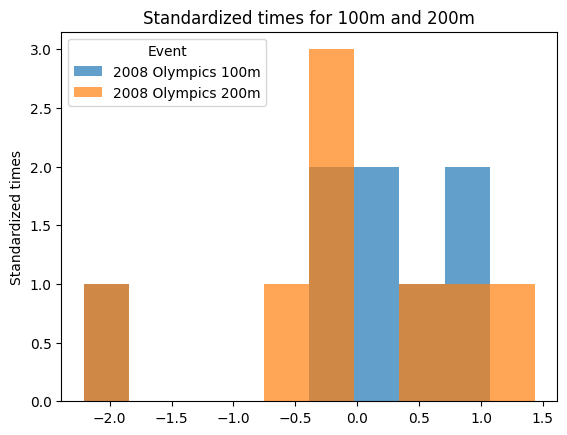

In [7]:
# YOUR CODE HERE
myplot = standardized.unstack("Event").plot.hist(alpha=0.7)
myplot.set_title("Standardized times for 100m and 200m")
myplot.set_ylabel("Standardized times")
myplot

## Part 2: Michael Phelps

Now let's standardize Michael Phelps's times in 5 individual events and compare them to Usain Bolt's times.

### Question 4

Unfortunately, the data for Phelps isn't nearly as clean. The times are stored in `minutes:seconds` format. Create a new column in the `DataFrame` with the time in seconds.

(_Hint:_ One way to do this is to use `.str.split(":")` and process the result.)

In [8]:
# YOUR CODE HERE
result = df_phelps['Time'].str.split(":")
min = result.str[0]
seconds = result.str[1]
final = min.astype(float) * 60 + seconds.astype(float)
df_phelps["Converted"] = final

### Question 5

Now, standardize the times for each event. Check your answer. How does Phelps compare with Bolt?

In [9]:
# YOUR CODE HERE
means = df_phelps.groupby("Event")["Converted"].mean()
stds = df_phelps.groupby("Event")["Converted"].std()

z_phelps = (df_phelps.set_index(["Event", "Athlete"])["Converted"] - means) / stds
print(z_phelps.xs("Michael Phelps",level = "Athlete"))
standardized.xs("Usain Bolt", level = "Athlete")

Event
2008 Olympics 200m freestyle   -1.922794
2008 Olympics 100m butterfly   -1.398947
2008 Olympics 200m butterfly   -1.621887
2008 Olympics 200m medley      -1.773098
2008 Olympics 400m medley      -1.665240
Name: Converted, dtype: float64


Event
2008 Olympics 100m   -2.208926
2008 Olympics 200m   -1.854401
Name: Time, dtype: float64

_YOUR INTERPRETATION HERE_